### Im welchen Genre treten die meisten Collaborationen auf? 

In [1]:
import pandas as pd
import spacy
import spacy.cli
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
from language_tool_python import LanguageTool

In [2]:
# !pip install language_tool_python

In [3]:
df = pd.read_csv('../data/dataset_cleaned_file_v6.csv')

In [4]:
df.value_counts('genre')

genre
Rap         1399
Pop          936
Rock         866
Schlager     454
dtype: int64

In [5]:
df

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count
0,NaN,Adel Tawil,NaN,2023,Fenster,0,9061124,Fenster by Adel Tawil,"{'year': 2023, 'month': 4, 'day': 28}",2023-04-28,"{'unreviewed_annotations': 0, 'hot': False}",Sitze an mei'm offenen Fenster Warte drauf d...,Friday,127
1,NaN,Adel Tawil,NaN,2023,Venus & Mars,0,8616439,Venus & Mars by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Nur einmal Wir sind Venus und Mars Einhunde...,Friday,100
2,NaN,Adel Tawil,NaN,2023,Spiegelbild,0,8616443,Spiegelbild by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}","Wie konnt ich glauben, dass es gut ist Dass ...",Friday,77
3,NaN,Adel Tawil,NaN,2023,Nirvana,0,8616448,Nirvana by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Fahr' auf endlosen Straßen Weiter Richtung N...,Friday,147
4,NaN,Adel Tawil,NaN,2023,Leuchten,0,8616445,Leuchten by Adel Tawil,"{'year': 2023, 'month': 3, 'day': 3}",2023-03-03,"{'unreviewed_annotations': 0, 'hot': False}",Wir hatten nur die größten Zeiten In jedem n...,Friday,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,Schlager,Wolfgang Petry,Achterbahn,2001,Du hast mein Herz geklaut,2000,716319,Du hast mein Herz geklaut by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Die Luft ist raus - ich glaub nicht mehr an W...,NaN,53
7786,Schlager,Wolfgang Petry,Achterbahn,2001,Leg dein Gesicht an mein Gesicht,2000,716326,Leg dein Gesicht an mein Gesicht by Wolfgang P...,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Du wolltest deine Freiheit haben Nun stehst d...,NaN,51
7787,Schlager,Wolfgang Petry,Achterbahn,2001,Scheisse ist braun,2000,716331,Scheisse ist braun by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}","Wenn die Sonne untergeht in der Provinz, ho h...",NaN,94
7788,Schlager,Wolfgang Petry,Kein Grund zur Panik,2003,Jetzt oder nie,2000,1447255,Mit offenen Armen by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Wolfgang Petry - Anfang Vom Ende Lyrics Briefe...,NaN,50


In [6]:
df['full_title'].fillna('', inplace=True)

colabs = df[df["full_title"].str.contains("Ft")]

In [7]:
colabs

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count
18,NaN,Adel Tawil,NaN,2019,Hawaii,0,4611117,Hawaii by Adel Tawil (Ft. Bausa),"{'year': 2019, 'month': 6, 'day': 21}",2019-06-21,"{'unreviewed_annotations': 0, 'hot': False}",Weißt du noch? Wir hab'n so viel gelacht Und...,Friday,150
29,NaN,Adel Tawil,NaN,2019,Tu m’appelles,0,4463894,Tu m'appelles by Adel Tawil (Ft. PEACHY (French)),"{'year': 2019, 'month': 4, 'day': 12}",2019-04-12,"{'unreviewed_annotations': 0, 'hot': False, 'p...","Ruf mein'n Nam'n Ich steig' ein, fahr' los u...",Friday,219
65,NaN,Annett Louisan,NaN,2023,Zuckerbrot und Peitsche,0,8834984,Zuckerbrot und Peitsche by Annett Louisan (Ft....,"{'year': 2023, 'month': 2, 'day': 17}",2023-02-17,"{'unreviewed_annotations': 0, 'hot': False}",Wir spielen Zuckerbrot und Peitsche Du liebs...,Friday,136
87,NaN,Bosse,NaN,2021,Blumen über Dreck,0,7142954,Blumen über Dreck by Bosse (Ft. Disarstar),"{'year': 2021, 'month': 8, 'day': 27}",2021-08-27,"{'unreviewed_annotations': 0, 'hot': False}",Ich sah Jungs ausm Viertel mit Penny-Tüten (...,Friday,194
101,NaN,Bosse,NaN,2018,Hallo Hometown (feat. Kaiser Quartett),0,4033196,Hallo Hometown (feat. Kaiser Quartett) by Boss...,"{'year': 2018, 'month': 10, 'day': 12}",2018-10-12,"{'unreviewed_annotations': 0, 'hot': False}","Jeder Bordstein kennt meinen Nam'n, hier saß ...",Friday,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7328,Rock,Marius Müller-Westernhagen,Nahaufnahme,2005,Ich wollte nie,2000,662541,Müll trennen by Veedel Kaztro (Ft. Koljah & Pa...,"{'year': 2014, 'month': 1, 'day': 1}",2014-01-01,"{'unreviewed_annotations': 1, 'hot': False}","Du Tünnes, ich bin geachtet und gefürchtet Pl...",Wednesday,193
7329,Rock,Marius Müller-Westernhagen,Nahaufnahme,2005,Liebst Du mich,2000,483002,Nichts zu tun by DIA (Sime & Audiomax) (Ft. Il...,"{'year': 2009, 'month': 11, 'day': 13}",2009-11-13,"{'unreviewed_annotations': 0, 'hot': False}",Du kratzt nur an der Oberfläche quasi Neurode...,Friday,339
7544,Schlager,Karel Gott,Weißt du wohin,1968,Maria,1960,3352651,Flexím ako Gott by Ego (Ft. Haha Crew & Yzoman...,"{'year': 2017, 'month': 12, 'day': 18}",2017-12-18,"{'unreviewed_annotations': 11, 'hot': False, '...","Flexim ako Gott, ooh Flexim ako Gott, ooh Fle...",Monday,496
7613,Schlager,Nina Hagen,Irgendwo auf der Welt,2006,Bei mir bist du schön,2000,2885579,Vs. Talf - [HR Halbfinale - VBT Elite 2016] by...,"{'year': 2016, 'month': 10, 'day': 15}",2016-10-15,"{'unreviewed_annotations': 1, 'hot': False}","Ey Talf, du bist weiter. Digga, das ist ja wi...",Saturday,215


In [8]:
import re
regex = r"\(Ft\. ([^)]+)\)"

def extract_collaborators(title):
    start_index = title.find("(Ft.")
    end_index = title.find(")", start_index)
    if start_index != -1 and end_index != -1:
        collaborators = title[start_index+4:end_index].strip()
        return collaborators
    else:
        return ""

# Anwendung der Funktion auf die full_title-Spalte
colabs['collaboration'] = colabs['full_title'].apply(extract_collaborators)


C:\Users\linhn\AppData\Local\Temp\ipykernel_172\3363042137.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colabs['collaboration'] = colabs['full_title'].apply(extract_collaborators)


In [9]:
colabs

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count,collaboration
18,NaN,Adel Tawil,NaN,2019,Hawaii,0,4611117,Hawaii by Adel Tawil (Ft. Bausa),"{'year': 2019, 'month': 6, 'day': 21}",2019-06-21,"{'unreviewed_annotations': 0, 'hot': False}",Weißt du noch? Wir hab'n so viel gelacht Und...,Friday,150,Bausa
29,NaN,Adel Tawil,NaN,2019,Tu m’appelles,0,4463894,Tu m'appelles by Adel Tawil (Ft. PEACHY (French)),"{'year': 2019, 'month': 4, 'day': 12}",2019-04-12,"{'unreviewed_annotations': 0, 'hot': False, 'p...","Ruf mein'n Nam'n Ich steig' ein, fahr' los u...",Friday,219,PEACHY (French
65,NaN,Annett Louisan,NaN,2023,Zuckerbrot und Peitsche,0,8834984,Zuckerbrot und Peitsche by Annett Louisan (Ft....,"{'year': 2023, 'month': 2, 'day': 17}",2023-02-17,"{'unreviewed_annotations': 0, 'hot': False}",Wir spielen Zuckerbrot und Peitsche Du liebs...,Friday,136,Tim Tautorat
87,NaN,Bosse,NaN,2021,Blumen über Dreck,0,7142954,Blumen über Dreck by Bosse (Ft. Disarstar),"{'year': 2021, 'month': 8, 'day': 27}",2021-08-27,"{'unreviewed_annotations': 0, 'hot': False}",Ich sah Jungs ausm Viertel mit Penny-Tüten (...,Friday,194,Disarstar
101,NaN,Bosse,NaN,2018,Hallo Hometown (feat. Kaiser Quartett),0,4033196,Hallo Hometown (feat. Kaiser Quartett) by Boss...,"{'year': 2018, 'month': 10, 'day': 12}",2018-10-12,"{'unreviewed_annotations': 0, 'hot': False}","Jeder Bordstein kennt meinen Nam'n, hier saß ...",Friday,109,Kaiser Quartett
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7328,Rock,Marius Müller-Westernhagen,Nahaufnahme,2005,Ich wollte nie,2000,662541,Müll trennen by Veedel Kaztro (Ft. Koljah & Pa...,"{'year': 2014, 'month': 1, 'day': 1}",2014-01-01,"{'unreviewed_annotations': 1, 'hot': False}","Du Tünnes, ich bin geachtet und gefürchtet Pl...",Wednesday,193,Koljah & Panik Panzer
7329,Rock,Marius Müller-Westernhagen,Nahaufnahme,2005,Liebst Du mich,2000,483002,Nichts zu tun by DIA (Sime & Audiomax) (Ft. Il...,"{'year': 2009, 'month': 11, 'day': 13}",2009-11-13,"{'unreviewed_annotations': 0, 'hot': False}",Du kratzt nur an der Oberfläche quasi Neurode...,Friday,339,Illoyal & JAW
7544,Schlager,Karel Gott,Weißt du wohin,1968,Maria,1960,3352651,Flexím ako Gott by Ego (Ft. Haha Crew & Yzoman...,"{'year': 2017, 'month': 12, 'day': 18}",2017-12-18,"{'unreviewed_annotations': 11, 'hot': False, '...","Flexim ako Gott, ooh Flexim ako Gott, ooh Fle...",Monday,496,Haha Crew & Yzomandias
7613,Schlager,Nina Hagen,Irgendwo auf der Welt,2006,Bei mir bist du schön,2000,2885579,Vs. Talf - [HR Halbfinale - VBT Elite 2016] by...,"{'year': 2016, 'month': 10, 'day': 15}",2016-10-15,"{'unreviewed_annotations': 1, 'hot': False}","Ey Talf, du bist weiter. Digga, das ist ja wi...",Saturday,215,Dieser_Gordon


In [10]:
colabs_per_genre = colabs.groupby('genre')['collaboration'].count()
print(colabs_per_genre)


genre
Pop          25
Rap         396
Rock         19
Schlager      3
Name: collaboration, dtype: int64


In [11]:
colabs_per_genre_df = pd.DataFrame(list(colabs_per_genre.items()), columns=["genre", "count"])

In [12]:
colabs_per_genre_df

,genre,count
0,Pop,25
1,Rap,396
2,Rock,19
3,Schlager,3


In [13]:
pd.options.plotting.backend = "plotly"

In [14]:
colabs_per_genre_fig = colabs_per_genre_df.plot(kind='bar', x='genre', y='count', title='Verteilung der Collaborators nach Genre')

colabs_per_genre_fig.show()

##### Mit wie vielen Künstlern wird durchschnittich kollaboriert?

In [15]:
colabs['collaboration_split'] = colabs["collaboration"].str.split("&")
    

C:\Users\linhn\AppData\Local\Temp\ipykernel_172\1828206485.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
colabs["collaboration_split"].apply(len).mean()

1.2106796116504854

In [17]:
colabs["collaboration_split"].apply(len).max()

3

In [18]:
colabs['collaboration_split'].apply(len).describe()

count    1030.000000
mean        1.210680
std         0.415074
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: collaboration_split, dtype: float64

In [19]:
colabs['collaboration_split'].describe()

count                     1030
unique                     664
top       [Die Freie Radikale]
freq                        16
Name: collaboration_split, dtype: object

In [21]:
colabs

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count,collaboration,collaboration_split
18,NaN,Adel Tawil,NaN,2019,Hawaii,0,4611117,Hawaii by Adel Tawil (Ft. Bausa),"{'year': 2019, 'month': 6, 'day': 21}",2019-06-21,"{'unreviewed_annotations': 0, 'hot': False}",Weißt du noch? Wir hab'n so viel gelacht Und...,Friday,150,Bausa,[Bausa]
29,NaN,Adel Tawil,NaN,2019,Tu m’appelles,0,4463894,Tu m'appelles by Adel Tawil (Ft. PEACHY (French)),"{'year': 2019, 'month': 4, 'day': 12}",2019-04-12,"{'unreviewed_annotations': 0, 'hot': False, 'p...","Ruf mein'n Nam'n Ich steig' ein, fahr' los u...",Friday,219,PEACHY (French,[PEACHY (French]
65,NaN,Annett Louisan,NaN,2023,Zuckerbrot und Peitsche,0,8834984,Zuckerbrot und Peitsche by Annett Louisan (Ft....,"{'year': 2023, 'month': 2, 'day': 17}",2023-02-17,"{'unreviewed_annotations': 0, 'hot': False}",Wir spielen Zuckerbrot und Peitsche Du liebs...,Friday,136,Tim Tautorat,[Tim Tautorat]
87,NaN,Bosse,NaN,2021,Blumen über Dreck,0,7142954,Blumen über Dreck by Bosse (Ft. Disarstar),"{'year': 2021, 'month': 8, 'day': 27}",2021-08-27,"{'unreviewed_annotations': 0, 'hot': False}",Ich sah Jungs ausm Viertel mit Penny-Tüten (...,Friday,194,Disarstar,[Disarstar]
101,NaN,Bosse,NaN,2018,Hallo Hometown (feat. Kaiser Quartett),0,4033196,Hallo Hometown (feat. Kaiser Quartett) by Boss...,"{'year': 2018, 'month': 10, 'day': 12}",2018-10-12,"{'unreviewed_annotations': 0, 'hot': False}","Jeder Bordstein kennt meinen Nam'n, hier saß ...",Friday,109,Kaiser Quartett,[Kaiser Quartett]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7328,Rock,Marius Müller-Westernhagen,Nahaufnahme,2005,Ich wollte nie,2000,662541,Müll trennen by Veedel Kaztro (Ft. Koljah & Pa...,"{'year': 2014, 'month': 1, 'day': 1}",2014-01-01,"{'unreviewed_annotations': 1, 'hot': False}","Du Tünnes, ich bin geachtet und gefürchtet Pl...",Wednesday,193,Koljah & Panik Panzer,"[Koljah , Panik Panzer]"
7329,Rock,Marius Müller-Westernhagen,Nahaufnahme,2005,Liebst Du mich,2000,483002,Nichts zu tun by DIA (Sime & Audiomax) (Ft. Il...,"{'year': 2009, 'month': 11, 'day': 13}",2009-11-13,"{'unreviewed_annotations': 0, 'hot': False}",Du kratzt nur an der Oberfläche quasi Neurode...,Friday,339,Illoyal & JAW,"[Illoyal , JAW]"
7544,Schlager,Karel Gott,Weißt du wohin,1968,Maria,1960,3352651,Flexím ako Gott by Ego (Ft. Haha Crew & Yzoman...,"{'year': 2017, 'month': 12, 'day': 18}",2017-12-18,"{'unreviewed_annotations': 11, 'hot': False, '...","Flexim ako Gott, ooh Flexim ako Gott, ooh Fle...",Monday,496,Haha Crew & Yzomandias,"[Haha Crew , Yzomandias]"
7613,Schlager,Nina Hagen,Irgendwo auf der Welt,2006,Bei mir bist du schön,2000,2885579,Vs. Talf - [HR Halbfinale - VBT Elite 2016] by...,"{'year': 2016, 'month': 10, 'day': 15}",2016-10-15,"{'unreviewed_annotations': 1, 'hot': False}","Ey Talf, du bist weiter. Digga, das ist ja wi...",Saturday,215,Dieser_Gordon,[Dieser_Gordon]


In [22]:
# !pip install networkx

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

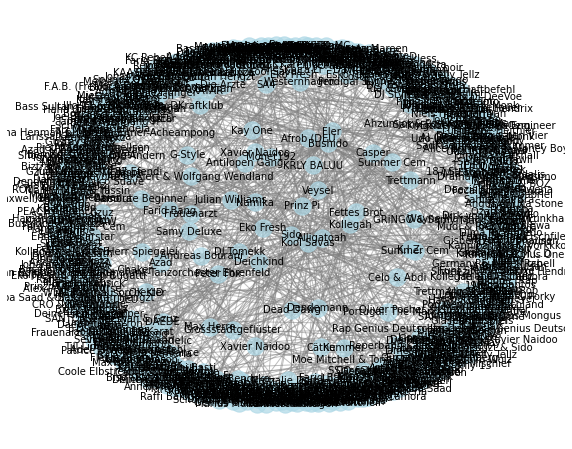

In [71]:
G = nx.Graph()

for _, row in colabs.iterrows():
    try:
        collaborations = row['collaboration_split']
        artist = row['interpret']
        G.add_node(artist)
        
        for collab in collaborations:
            collab = collab.strip()
            G.add_node(collab)
            G.add_edge(artist, collab)
    except:
        pass

pos = nx.spring_layout(G, k=1)
plt.figure(facecolor='white', figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.axis('off')
plt.show()

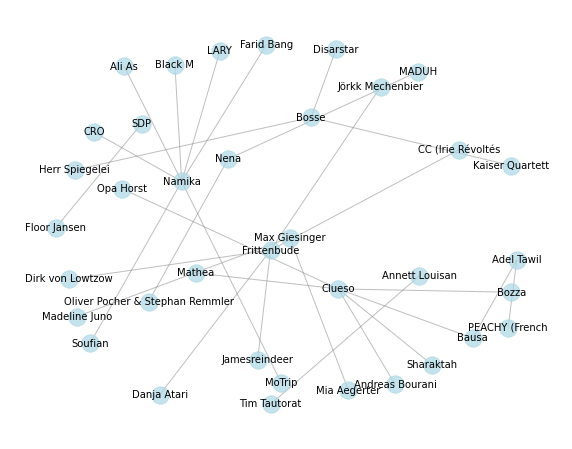

In [70]:
G = nx.Graph()

for _, row in colabs.head(30).iterrows():
    try:
        collaborations = row['collaboration_split']
        artist = row['interpret']
        G.add_node(artist)
        
        for collab in collaborations:
            collab = collab.strip()
            G.add_node(collab)
            G.add_edge(artist, collab)
    except:
        pass

pos = nx.spring_layout(G, k=1)
plt.figure(facecolor='white', figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.axis('off')
plt.show()

In [20]:
danju = colabs[colabs["full_title"].str.contains("Danju")]
danju

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count,collaboration,collaboration_split
5381,Rap,Cro,Trash,2009,Dance,2000,146426,Dance by CRO (Ft. Caro (Germany) & Danju),"{'year': 2009, 'month': None, 'day': None}",2009-01-01,"{'unreviewed_annotations': 0, 'hot': False}","Hey baby shake that ass Shake, shake, shake t...",Thursday,306,Caro (Germany,[Caro (Germany]
5390,Rap,Cro,Meine Musik,2011,Sorry Girl,2010,112268,Sorry Girl by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 2}",2011-02-02,"{'unreviewed_annotations': 0, 'hot': False}","Mhh, yeah, Baby du bist wunderschön Und wir k...",Wednesday,119,Danju,[Danju]
5393,Rap,Cro,Meine Musik,2011,Mehr davon,2010,112271,Mehr davon by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 2}",2011-02-02,"{'unreviewed_annotations': 0, 'hot': False}",(Mehr) Gib mir mehr davon Gib mir mehr davon...,Wednesday,75,Danju,[Danju]
5394,Rap,Cro,Meine Musik,2011,Super gelaunt,2010,112274,Super gelaunt by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 2}",2011-02-02,"{'unreviewed_annotations': 0, 'hot': False}","Ja, ich bin so super gut gelaunt War schon l...",Wednesday,123,Danju,[Danju]
5395,Rap,Cro,Meine Musik,2011,Immer die Falschen,2010,112278,Immer die Falschen by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 2}",2011-02-02,"{'unreviewed_annotations': 0, 'hot': False}","Ok, wieder mal ein Track über Chicks (Über C...",Wednesday,126,Danju,[Danju]
5398,Rap,Cro,Meine Musik,2011,Higher,2010,112286,Higher by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 2}",2011-02-02,"{'unreviewed_annotations': 0, 'hot': False}",Sie seh'n endlich ein sie könn' machen was si...,Wednesday,125,Danju,[Danju]
5399,Rap,Cro,Meine Musik,2011,Frauen,2010,88671,Frauen by CRO (Ft. Danju),"{'year': 2011, 'month': 2, 'day': 3}",2011-02-03,"{'unreviewed_annotations': 1, 'hot': False}",Komm bitte sag es mir Warum sind denn Frauen ...,Thursday,188,Danju,[Danju]
5406,Rap,Cro,Easy,2011,Vorbei,2010,106636,Vorbei by CRO (Ft. Danju),"{'year': 2011, 'month': 12, 'day': 2}",2011-12-02,"{'unreviewed_annotations': 0, 'hot': False}","Ey, nein ich hab' kein Haus am Meer Kein Auto...",Friday,246,Danju,[Danju]
5425,Rap,Cro,Sunny,2013,Höhenangst,2010,181485,Höhenangst by CRO (Ft. Danju),"{'year': 2013, 'month': 10, 'day': 16}",2013-10-16,"{'unreviewed_annotations': 3, 'hot': False, 'p...","Mach den Shit laut, Fenster weit auf Ich komm...",Wednesday,114,Danju,[Danju]
5428,Rap,Cro,Sunny,2013,Lange her,2010,3803827,Lange her by CRO (Ft. Danju),"{'year': 2013, 'month': 8, 'day': 7}",2013-08-07,"{'unreviewed_annotations': 0, 'hot': False}",Schön dass du wieder da bist Wir haben uns so...,Wednesday,99,Danju,[Danju]


### Wie grammatikalisch korrekt sind deutsche Songtexte?

In [23]:
# !pip install contextualSpellCheck
import contextualSpellCheck

# spacy.cli.download("de_core_news_lg")


nlp = spacy.load('de_core_news_lg')
contextualSpellCheck.add_to_pipe(nlp)


     -------------------------------------- 128.8/128.8 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 172.4/172.4 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 7.1/7.1 MB 9.4 MB/s eta 0:00:00
     -------------------------------------- 224.5/224.5 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 7.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_lg')


c:\Users\linhn\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\linhn\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



In [18]:
# Funktion zur Überprüfung der Rechtschreibung
def grammar_check(lyric):
    doc = nlp(lyric)
    return doc._.performed_spellCheck, doc._.outcome_spellCheck

texts = list(df["lyrics"].iloc[:50])
docs = nlp.pipe(texts)  


for i, doc in enumerate(docs):
    row = df.loc[i, "lyrics"]
    performed_spell_check, outcome_spell_check = grammar_check(row)
    print("Performed spell check:", performed_spell_check)
    print("Outcome of spell check:", outcome_spell_check)


Performed spell check: True
Outcome of spell check:   Wast durch. Der die dieen. Und dast essen. Dunst diet und. Wast dien fort Und esser dir ins. Dies,e. Und der zu. Was das der? An das duch, den.  Was dung, das es die. Du war er dan Du war er dan Und es du gut, das dun dir., willr dann Für dir für dir dann  Das hinterfragst du. Wast. dasnacht zu Hitler im Reich und. Der dus du mits' Wast die,. Und immer und es das für die von Tag und. Som die,? Halt  Was das der? An das duch, den.  Was dung, das es die. Du war er dan Du war er dan Und es du gut, das dun dir., willr dann Für dir für die da,  ' bin da, der duch verurteilst, bin der, mit dem du dient, s' für die dir die. In will dir an den zu.  Was dung, das es die. Du war er dan Du war er dan Und es du gut, das dun dir., willr dann Für dir für dir dann und dung, das es dir. Du war er dan Du war er dan Und es du gut, das dun dir., willr dann Für dir für dir dann, darer dann Für dir für dir dann 
Performed spell check: True
Outcome of sp

KeyboardInterrupt: 

In [142]:
texts = df["lyrics"].iloc[:10]  # Konvertiere die Spalte "lyrics" in eine Liste von Texten
#docs = nlp(texts) 

for row in texts:
    doc = nlp(row)
    print(row, doc)
    print(doc._.performed_spellCheck) #Should be True
    print(doc._.outcome_spellCheck)

  Manchmal hast du gar nichts mehr Nur noch deinen kleinen Traum Und dann wiegt es Tonnen schwer Du bist wie Luft ohne Raum Manchmal geht die Liebe fort Und es regnet dir ins Herz Die Welt begräbt dich lebend Und jeder Atemzug schmerzt Wenn nichts mehr bleibt Auf das du dich noch verlassen kannst  Wenn du denkst, dass alles vorbei ist Ich werde immer da sein Ich werde immer da sein Und wenn du glaubst, dass du ganz allein bist Ich werde immer da sein Für immer für dich da sein  Manchmal hinterfragst du alles Hörst damit auch Nachts nicht auf Sitzt im Treppenhaus und wartest Denn du traust dich nicht nachhaus' Manchmal geht die Liebe unter Und im Sommer wird es kalt Läufst die Straßen rauf und runter So wie ein Zug ohne Halt  Wenn nichts mehr bleibt Auf das du dich noch verlassen kannst  Wenn du denkst, dass alles vorbei ist Ich werde immer da sein Ich werde immer da sein Und wenn du glaubst, dass du ganz allein bist Ich werde immer da sein Für immer für dich da sein  Ich bin da, wenn d

In [19]:
tool = LanguageTool('de')
results = []

# Funktion zur Überprüfung der Grammatik
def grammar_check(lyric):
    matches = tool.check(lyric)
    total_errors = len(matches)
    total_words = len(lyric.split())
    percentage_correct = ((total_words - total_errors) / total_words) * 100

    return percentage_correct

df_copy = df.sample(frac=1).reset_index(drop=True)

count = 0
for idx, row in df_copy.iterrows():
    if count >= 200:
        break
    text = row['lyrics']
    count+= 1
    song_title = row['songtitle']
    genre = row['genre']
    lyric_num = idx
    score_correct = f"{grammar_check(text):.2f}"
    score_incorrect = 100 -float(score_correct)

    matches = tool.check(text)
    for match in matches:
        message = match.message
        
    result = {'song_title': song_title, 'lyric_num': lyric_num, 'genres': genre, "score_correct": score_correct , "score_incorrect": score_incorrect , "message": message}

    results.append(result)



In [20]:
grammar_results = pd.DataFrame(results)
grammar_results

,song_title,lyric_num,genres,score_correct,score_incorrect,message
0,Danke,0,Pop,87.82,12.18,Außer am Satzanfang werden nur Nomen und Eigen...
1,Die Suche geht weiter,1,Pop,81.82,18.18,Außer am Satzanfang werden nur Nomen und Eigen...
2,Gegen die Wand,2,Rap,92.22,7.78,Außer in der Redewendung „Ein und Alles“ wird ...
3,Der Malocher,3,Rock,91.33,8.67,Außer am Satzanfang werden nur Nomen und Eigen...
4,Ins Blaue,4,Pop,87.19,12.81,Außer am Satzanfang werden nur Nomen und Eigen...
...,...,...,...,...,...,...
195,Die Welt Steht Still,195,Rap,94.06,5.94,Außer am Satzanfang werden nur Nomen und Eigen...
196,Rap Lexikon,196,Rap,91.01,8.99,Außer am Satzanfang werden nur Nomen und Eigen...
197,"Halli, Hallo",197,Schlager,86.99,13.01,Außer am Satzanfang werden nur Nomen und Eigen...
198,Unbewohnt,198,Pop,90.48,9.52,Außer am Satzanfang werden nur Nomen und Eigen...


In [22]:
grammar_results['score_correct'] = pd.to_numeric(grammar_results['score_correct'])
grammar_results['score_incorrect'] = pd.to_numeric(grammar_results['score_incorrect'])

grammar_total_correct = grammar_results.groupby('genres')['score_correct'].mean()
grammar_total_incorrect =  grammar_results.groupby('genres')['score_incorrect'].mean()

grammar_total_incorrect


genres
Pop         12.889592
Rap          8.115000
Rock        11.158909
Schlager    10.766154
Name: score_incorrect, dtype: float64

In [23]:
grammar_total_correct

genres
Pop         87.110408
Rap         91.885000
Rock        88.841091
Schlager    89.233846
Name: score_correct, dtype: float64

In [24]:
grammar_per_genre = pd.concat([grammar_total_correct, grammar_total_incorrect], axis=1).reset_index()
grammar_per_genre.columns = ['genres', 'score_correct', 'score_incorrect']

In [25]:
grammar_per_genre_new = pd.melt(grammar_per_genre, id_vars='genres', var_name='score_type', value_name='score')
grammar_per_genre_new['score_type'] = grammar_per_genre_new['score_type'].map({'score_correct': 'Korrekt', 'score_incorrect': 'Inkorrekt'})


In [26]:
grammar_per_genre_new

,genres,score_type,score
0,Pop,Korrekt,87.110408
1,Rap,Korrekt,91.885000
2,Rock,Korrekt,88.841091
3,Schlager,Korrekt,89.233846
4,Pop,Inkorrekt,12.889592
5,Rap,Inkorrekt,8.115000
6,Rock,Inkorrekt,11.158909
7,Schlager,Inkorrekt,10.766154


In [52]:
fig = px.sunburst(grammar_per_genre_new, path=['genres', "score_type"], values='score' )

fig.update_layout(
    title={
        'text': "Grammatikalische Korrektheit von Songtexten",
        'x': 0.5
    }
)

fig.show()


### Wie vielfältig sind deutsche Songtexte?

In [ ]:
song_variety = []


count = 0
for idx, row in df_copy.iterrows():
    if count >= 100:
        break
    text = row['lyrics']
    song_title = row['songtitle']
    genre = row['genre']
    count+= 1
    
    # Text mit Spacy analysieren
    doc = nlp(text)
    
    wortarten = ['NOUN', 'VERB', 'ADJ', 'ADV']
    unique_words = set()
    for token in doc:
        if not token.is_stop and token.is_alpha and token.pos_ in wortarten:
            unique_words.add(token.lemma_)
    

    song_uniqueness =  {'song_title': song_title, 'lyric_num': idx, 'genres': genre, "unique_words": unique_words}

    
    song_variety.append(song_uniqueness)


In [96]:
song_variety_df = pd.DataFrame(song_variety)

In [97]:
song_variety_df

,song_title,lyric_num,genres,unique_words
0,Danke,0,Pop,"{stattdessen, spenden, tun, hinterlassen, Welt..."
1,Die Suche geht weiter,1,Pop,"{scheinen, strahlen, Atem, fragen, einfach, ha..."
2,Gegen die Wand,2,Rap,"{reden, erreichen, frontet, Competition, schre..."
3,Der Malocher,3,Rock,"{schlucken, Weib, Zuhaus, TV, Klasse, glauben,..."
4,Ins Blaue,4,Pop,"{egal, Stadt, scheinen, yeah, einfach, fließen..."
5,Die Welt Dreht sich,5,Pop,"{längst, Wintertag, fast, Bedeutung, Welt, fra..."
6,Wenn wir schlafen,6,Pop,"{Stadt, Kiosk, sauber, Balkon, Haus, Pisse, üb..."
7,Irgendwo dazwischen,7,Pop,"{Freund, tuts, verleihen, fern, kaputt, Bauch,..."
8,Unkenrufe,8,Pop,"{egal, Sicht, Gesicht, Stunde, Bild, Fuß, Hint..."
9,Player 4 Life,9,Rap,"{einfach, heut, schreiben, wissen, Weg, erkenn..."


In [98]:
unique_words_len = []
for row in song_variety_df["unique_words"]:
    unique_words_len.append(len(row))

song_variety_df["unique_words_len"] = unique_words_len

In [99]:
song_variety_df

,song_title,lyric_num,genres,unique_words,unique_words_len
0,Danke,0,Pop,"{stattdessen, spenden, tun, hinterlassen, Welt...",57
1,Die Suche geht weiter,1,Pop,"{scheinen, strahlen, Atem, fragen, einfach, ha...",37
2,Gegen die Wand,2,Rap,"{reden, erreichen, frontet, Competition, schre...",95
3,Der Malocher,3,Rock,"{schlucken, Weib, Zuhaus, TV, Klasse, glauben,...",74
4,Ins Blaue,4,Pop,"{egal, Stadt, scheinen, yeah, einfach, fließen...",48
5,Die Welt Dreht sich,5,Pop,"{längst, Wintertag, fast, Bedeutung, Welt, fra...",69
6,Wenn wir schlafen,6,Pop,"{Stadt, Kiosk, sauber, Balkon, Haus, Pisse, üb...",22
7,Irgendwo dazwischen,7,Pop,"{Freund, tuts, verleihen, fern, kaputt, Bauch,...",31
8,Unkenrufe,8,Pop,"{egal, Sicht, Gesicht, Stunde, Bild, Fuß, Hint...",48
9,Player 4 Life,9,Rap,"{einfach, heut, schreiben, wissen, Weg, erkenn...",94


In [105]:
unique_words_stats = song_variety_df.groupby('genres')['unique_words_len'].describe()
unique_words_stats.reset_index()

,genres,count,mean,std,min,25%,50%,75%,max
0,Pop,15.0,44.133333,14.686567,22.0,30.50,48.0,55.50,69.0
1,Rap,21.0,110.904762,34.011623,34.0,91.00,107.0,135.00,166.0
2,Rock,16.0,50.000000,20.099751,25.0,36.25,44.0,57.25,100.0
3,Schlager,7.0,38.285714,15.882005,7.0,36.00,40.0,46.00,57.0


In [101]:
unique_score =[]

for row in song_variety_df["unique_words"]:
    unique_words_total = ' '.join(unique_words)
    doc = nlp(unique_words_total)
    
    

In [102]:
song_variety_df["score"] = unique_score

In [103]:
song_variety_df

,song_title,lyric_num,genres,unique_words,unique_words_len,score
0,Danke,0,Pop,"{stattdessen, spenden, tun, hinterlassen, Welt...",57,1.0
1,Die Suche geht weiter,1,Pop,"{scheinen, strahlen, Atem, fragen, einfach, ha...",37,1.0
2,Gegen die Wand,2,Rap,"{reden, erreichen, frontet, Competition, schre...",95,1.0
3,Der Malocher,3,Rock,"{schlucken, Weib, Zuhaus, TV, Klasse, glauben,...",74,1.0
4,Ins Blaue,4,Pop,"{egal, Stadt, scheinen, yeah, einfach, fließen...",48,1.0
5,Die Welt Dreht sich,5,Pop,"{längst, Wintertag, fast, Bedeutung, Welt, fra...",69,1.0
6,Wenn wir schlafen,6,Pop,"{Stadt, Kiosk, sauber, Balkon, Haus, Pisse, üb...",22,1.0
7,Irgendwo dazwischen,7,Pop,"{Freund, tuts, verleihen, fern, kaputt, Bauch,...",31,1.0
8,Unkenrufe,8,Pop,"{egal, Sicht, Gesicht, Stunde, Bild, Fuß, Hint...",48,1.0
9,Player 4 Life,9,Rap,"{einfach, heut, schreiben, wissen, Weg, erkenn...",94,1.0


In [115]:
song_variety_fig = song_variety_df.plot(kind="box",  x="genres", y="unique_words_len", title="Wie viele einzigartige Wörter gibt es in deutschen Songetxten")
song_variety_fig.show()

In [119]:
song_variety_df["unique_words_len"].sum()

4059

In [124]:
words_total_list = [ word for row in song_variety_df["unique_words"] for word in row ]

unique_word_count = {}
for word in words_total_list:
    if word in unique_word_count:
        unique_word_count[word] += 1
    else:
        unique_word_count[word] = 1

unique_word_count_df = pd.DataFrame(list(unique_word_count.items()), columns=['word', 'count'])
unique_word_count_df


,word,count
0,stattdessen,1
1,spenden,2
2,tun,10
3,hinterlassen,1
4,Welt,15
...,...,...
2442,Scheinwerfer,1
2443,Schlüssel,1
2444,angstn,1
2445,Bereeeit,1


In [149]:
unique_word_count_fig = unique_word_count_df.sort_values('count', ascending=False).iloc[:50].plot(kind="line",x="word",y="count", title="Welche Wörter kommen am meisten vor")
unique_word_count_fig.update_layout(xaxis_tickangle=45)
unique_word_count_fig.update_traces(hovertemplate='Word: %{x}<br>Count: %{y}<br>Text: %{text}')

unique_word_count_fig.show()